In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, ClusterMixin

from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV


/tmp/ipykernel_46499/2804129643.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('/home/ravindra/Downloads/spotify_genre_final.xlsx')
print(data.shape)


(6917, 23)


In [3]:
data.drop(data.columns[6],axis =1, inplace = True)
data.duplicated().sum()#there are no duplicate rows !
data.isnull().sum() #there are no columns with null values either!

Genre                     0
Title                     0
Album_cover_link          0
Artist                    0
duration_ms               0
explicit                  0
popularity                0
release_date              0
release_date_precision    0
total_tracks              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [4]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)


['Genre', 'Title', 'Album_cover_link', 'Artist', 'explicit', 'release_date', 'release_date_precision']


In [5]:
data.drop(['Genre', 'Title', 'Album_cover_link', 'Artist', 'explicit','release_date','release_date_precision'], axis=1, inplace=True)


In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
df_scaled

array([[ 1.28971872,  1.12088324,  2.08256639, ..., -1.66386532,
        -0.0979103 ,  0.11110587],
       [ 1.00872821,  1.35265494, -0.45722847, ..., -1.0851054 ,
        -0.401445  ,  0.11110587],
       [ 1.43180602,  1.19814048, -0.21534324, ..., -0.65639436,
         0.76503781,  0.11110587],
       ...,
       [-0.80724683, -2.04666322, -0.09440063, ...,  0.17101796,
        -1.25361252,  0.11110587],
       [ 0.26768406, -1.11957645, -0.09440063, ...,  0.86552986,
         0.71199153,  0.11110587],
       [-1.04881364, -1.04231922, -0.09440063, ..., -1.47094535,
        -1.09547319,  0.11110587]])

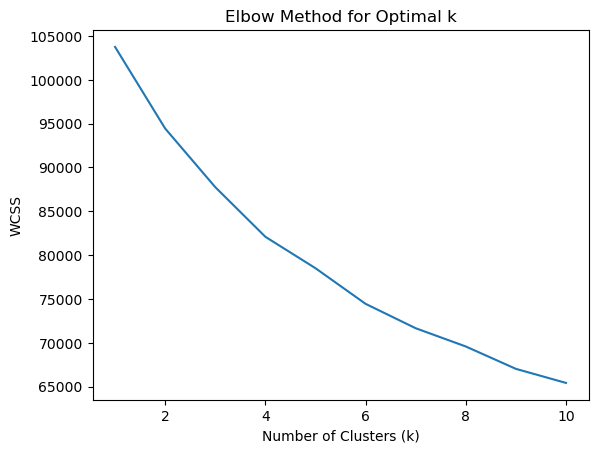

In [7]:
# List to store WCSS values
wcss = []

# Loop over a range of k values (e.g., 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)  # Apply K-means on your scaled data
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')   #as for my observation...the elbow is at 4.
plt.show()

In [8]:
print(df_scaled.shape)

(6917, 15)


Cumulative Explained Variance for each number of components:
Component 1: 0.1406
Component 2: 0.2571
Component 3: 0.3442
Component 4: 0.4229
Component 5: 0.4934
Component 6: 0.5605
Component 7: 0.6237
Component 8: 0.6859
Component 9: 0.7441
Component 10: 0.7999
Component 11: 0.8534
Component 12: 0.9051
Component 13: 0.9488
Component 14: 0.9845
Component 15: 1.0000


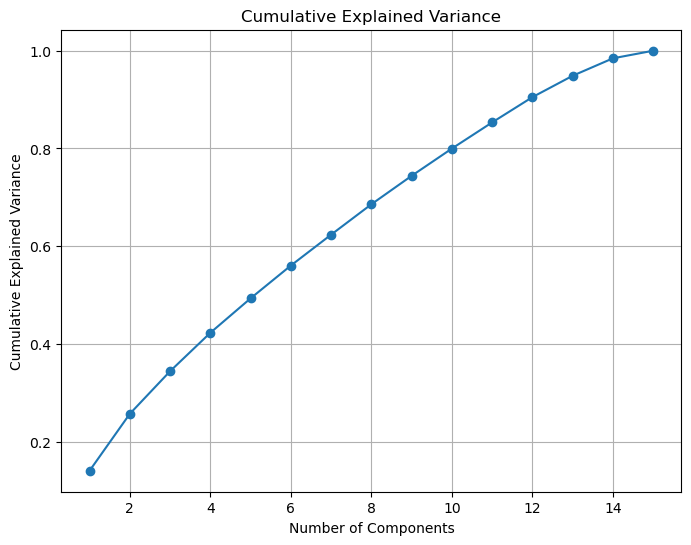


Optimal number of components to explain 90% of the variance: 12


In [9]:


# Apply PCA and fit to your scaled dataset
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Print cumulative explained variance for each component
print("Cumulative Explained Variance for each number of components:")
for i, var in enumerate(cumulative_variance):
    print(f"Component {i+1}: {var:.4f}")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Decide the optimal number of components based on 90% variance threshold
n_components_90 = next(i for i, v in enumerate(cumulative_variance) if v > 0.90) + 1
print(f"\nOptimal number of components to explain 90% of the variance: {n_components_90}")


In [19]:




# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create DataFrame with 2 components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])



# Display first few rows
print(pca_df.head())


        PC1       PC2
0 -1.303338 -1.391768
1 -0.939168 -1.816862
2  0.456457 -1.766688
3  0.293995 -0.827077
4 -4.430607 -0.311677


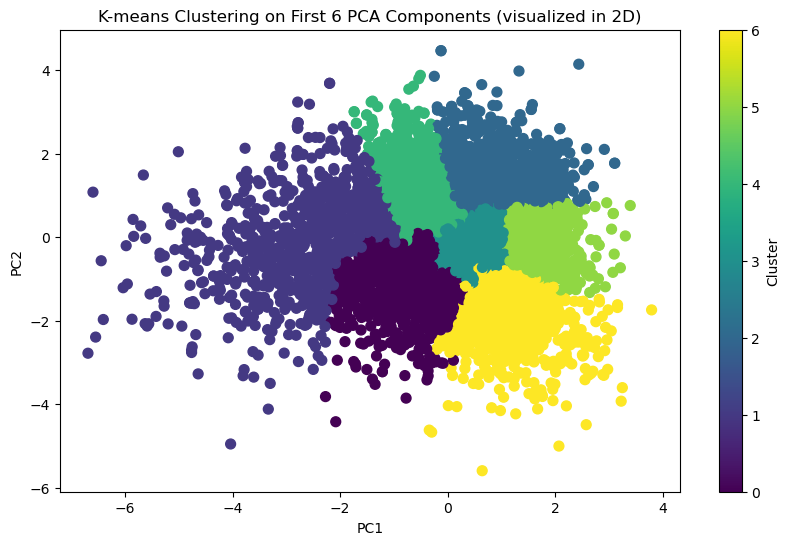

Silhouette Score (K-means, 10 PCA components): 0.774


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply K-means clustering on the PCA-transformed features (6 components)
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=100, random_state=42)

# Fit K-means to the first 6 PCA features
kmeans.fit(pca_df.iloc[:, :10])

# Get the cluster labels assigned to each data point
cluster_labels_kmeans = kmeans.labels_

# Add the cluster labels as a new column in the PCA DataFrame
pca_df['Cluster_KMeans'] = cluster_labels_kmeans

# Plot PC1 vs PC2 colored by K-means cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_KMeans'], cmap='viridis', s=50)
plt.title('K-means Clustering on First 6 PCA Components (visualized in 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score using all 6 PCA components
sil_score = silhouette_score(pca_df.iloc[:, :10], cluster_labels_kmeans)
print(f"Silhouette Score (K-means, 10 PCA components): {sil_score:.3f}")


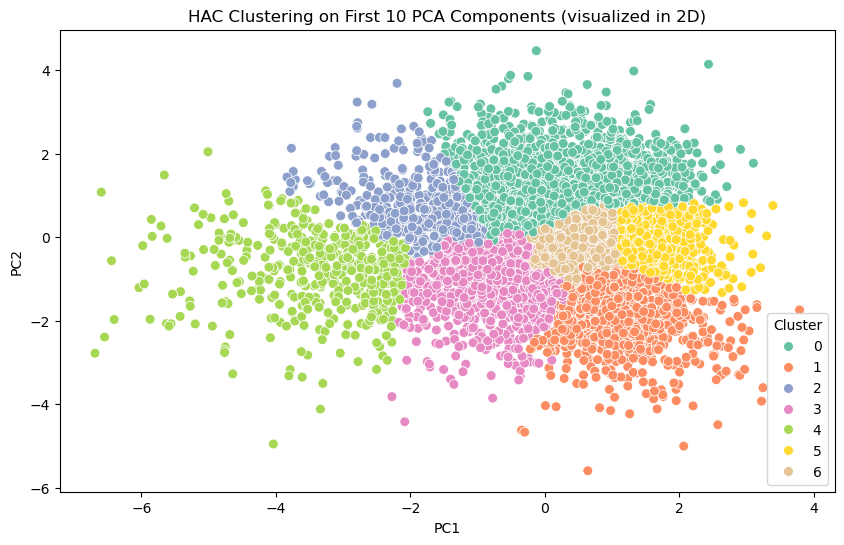

Silhouette Score (HAC, 10 PCA components): 0.684


In [39]:


# -------------------------------
# Apply HAC with Euclidean metric and Ward linkage
# -------------------------------
hac = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')

# Fit HAC to the PCA-transformed features (first 10 PCA components)
cluster_labels_hac = hac.fit_predict(pca_df.iloc[:, :10])

# Add the HAC cluster labels as a new column in the PCA DataFrame
pca_df['Cluster_HAC'] = cluster_labels_hac

# -------------------------------
# Visualize HAC clusters on PC1 vs PC2
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_HAC', data=pca_df, palette='Set2', s=50)
plt.title('HAC Clustering on First 10 PCA Components (visualized in 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

# -------------------------------
# Calculate Silhouette Score for HAC
# -------------------------------
sil_score_hac = silhouette_score(pca_df.iloc[:, :10], cluster_labels_hac)
print(f"Silhouette Score (HAC, 10 PCA components): {sil_score_hac:.3f}")


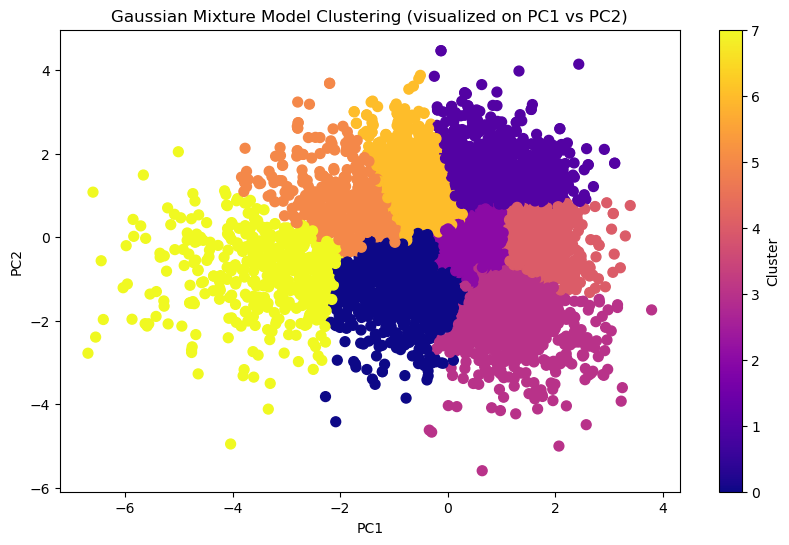

Silhouette Score (GMM, 10 PCA components): 0.798


In [50]:
from sklearn.mixture import GaussianMixture


# Fit GMM on the first 10 PCA components
gmm = GaussianMixture(n_components=8, covariance_type='full', n_init=10, random_state=42)
gmm.fit(pca_df.iloc[:, :10])

# Predict cluster labels
cluster_labels_gmm = gmm.predict(pca_df.iloc[:, :10])

# Add GMM cluster labels to the DataFrame
pca_df['Cluster_GMM'] = cluster_labels_gmm

# Visualize the clustering on PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels_gmm, cmap='plasma', s=50)
plt.title('Gaussian Mixture Model Clustering (visualized on PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Compute silhouette score
sil_score_gmm = silhouette_score(pca_df.iloc[:, :10], cluster_labels_gmm)
print(f"Silhouette Score (GMM, 10 PCA components): {sil_score_gmm:.3f}")


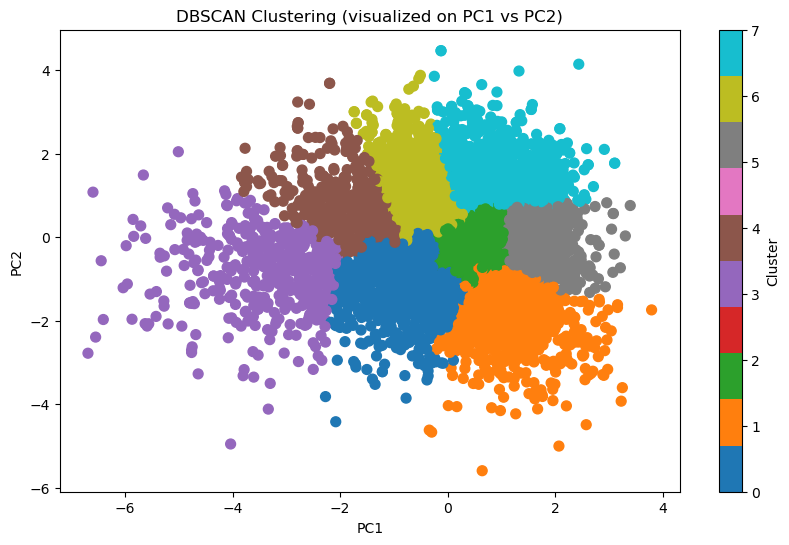

Number of clusters found by DBSCAN: 8
Silhouette Score (DBSCAN, 10 PCA components): 0.798


In [51]:
from sklearn.cluster import DBSCAN


# Fit DBSCAN on the first 10 PCA components
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean')  # tweak eps if needed
cluster_labels_dbscan = dbscan.fit_predict(pca_df.iloc[:, :10])

# Add DBSCAN cluster labels to the DataFrame
pca_df['Cluster_DBSCAN'] = cluster_labels_dbscan

# Visualize the clustering on PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels_dbscan, cmap='tab10', s=50)
plt.title('DBSCAN Clustering (visualized on PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Count number of clusters (excluding noise points labeled -1)
n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

# Calculate silhouette score (only if more than 1 cluster)
if n_clusters_dbscan > 1:
    sil_score_dbscan = silhouette_score(pca_df.iloc[:, :10], cluster_labels_dbscan)
    print(f"Silhouette Score (DBSCAN, 10 PCA components): {sil_score_dbscan:.3f}")
else:
    print("Silhouette Score cannot be computed (less than 2 clusters found).")


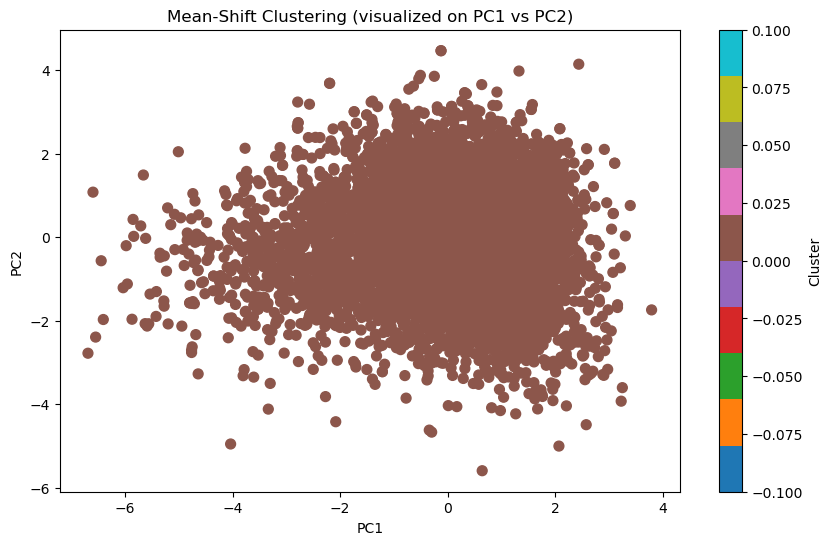

Number of clusters found by Mean-Shift: 1
Silhouette Score cannot be computed (only one cluster found).


In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth


# Estimate bandwidth for MeanShift (you can also set a fixed bandwidth)
bandwidth = estimate_bandwidth(pca_df.iloc[:, :10], quantile=0.7, n_samples=500, random_state=42)

# Fit MeanShift clustering
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster_labels_meanshift = meanshift.fit_predict(pca_df.iloc[:, :10])

# Add cluster labels to the PCA DataFrame
pca_df['Cluster_MeanShift'] = cluster_labels_meanshift

# Visualize the clusters using PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels_meanshift, cmap='tab10', s=50)
plt.title('Mean-Shift Clustering (visualized on PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Count number of clusters
n_clusters_meanshift = len(set(cluster_labels_meanshift))
print(f"Number of clusters found by Mean-Shift: {n_clusters_meanshift}")

# Silhouette Score (only if more than 1 cluster)
if n_clusters_meanshift > 1:
    sil_score_meanshift = silhouette_score(pca_df.iloc[:, :10], cluster_labels_meanshift)
    print(f"Silhouette Score (Mean-Shift, 10 PCA components): {sil_score_meanshift:.3f}")
else:
    print("Silhouette Score cannot be computed (only one cluster found).")
